# Input-output properties cells

In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
CircuitPath = '/home/fernando/CA1_netpyne/info/data-bbp/20191017/'
BioName = CircuitPath + 'bioname/'
Atlas = CircuitPath + 'atlas/'
MorphologyPath = CircuitPath + 'morphologies/swc/'
CellLibraryFile = CircuitPath + 'sonata/nodes/nodes_hippocampus.h5'
METypePath = CircuitPath + 'emodels/20190402/hoc/'
MEComboInfoFile = CircuitPath + 'emodels/20190402/mecombo_emodel.tsv'
UserTargetFile = CircuitPath + 'user.target'
StartTargetFile = CircuitPath + 'start.target'

In [4]:
from bluepysnap import Circuit
from bluepysnap.bbp import Cell
circuit_path = CircuitPath + 'circuit_config.json'
circuit = Circuit(circuit_path)
cells = circuit.nodes["hippocampus_neurons"]

In [5]:
nodesinfo = cells.get()
nodesinfo

etype layer                            model_template   model_type  \
0       bAC   SLM   hoc:CA1_int_bAC_011127HP1_2019032911561  biophysical   
1       bAC   SLM   hoc:CA1_int_bAC_011127HP1_2019032911561  biophysical   
2       bAC   SLM   hoc:CA1_int_bAC_011127HP1_2019032911561  biophysical   
3       cAC    SR   hoc:CA1_int_cAC_990611HP2_2019032816214  biophysical   
4       cAC    SR   hoc:CA1_int_cAC_990611HP2_2019032816214  biophysical   
...     ...   ...                                       ...          ...   
18193  cNAC    SO    hoc:CA1_int_cNAC_970717D_2019030718251  biophysical   
18194  cNAC    SO    hoc:CA1_int_cNAC_970911C_2019030512040  biophysical   
18195  cNAC    SO    hoc:CA1_int_cNAC_970911C_2019030512040  biophysical   
18196  cNAC    SO  hoc:CA1_int_cNAC_990111HP2_2019032915570  biophysical   
18197  cNAC    SO  hoc:CA1_int_cNAC_970509HP2_2019030511562  biophysical   

      morph_class                                      morphology    mtype  \
0             INT          011127HP1_-_Scale_x1.000_y0.850_z1.000  SLM_PPA   
1             INT          011127HP1_-_Scale_x1.000_y0.850_z1.000  SLM_PPA   
2             INT          011127HP1_-_Scale_x1.000_y0.850_z1.000  SLM_PPA   
3             INT                                       990611HP2   SR_SCA   
4             INT          990611HP2_-_Scale_x1.000_y1.050_z1.000   SR_SCA   
...           ...                                             ...      ...   
18193         INT                                         980120A    SO_BP   
18194         INT            980120A_-_Scale_x1.000_y1.150_z1.000    SO_BP   
18195         INT  980120A_-_Scale_x1.000_y0.850_z1.000_-_Clone_0    SO_BP   
18196         INT            980120A_-_Scale_x1.000_y1.150_z1.000    SO_BP   
18197         INT            980120A_-_Scale_x1.000_y1.150_z1.000    SO_BP   

        region  rotation_angle_xaxis  rotation_angle_yaxis  \
0      mc5;SLM             -0.000000              0.306704   
1      mc3;SLM             -3.141593              1.051681   
2      mc6;SLM             -3.141593              1.393882   
3       mc5;SR             -3.141593              0.347655   
4       mc5;SR             -0.000000              0.137277   
...        ...                   ...                   ...   
18193   mc3;SO             -3.141593              1.303866   
18194   mc3;SO              0.000000             -1.070015   
18195   mc0;SO             -3.141593              1.267531   
18196   mc4;SO             -0.000000              0.815231   
18197   mc5;SO             -0.000000              0.121097   

       rotation_angle_zaxis synapse_class           x           y  \
0                 -0.000000           INH  409.446689  525.218483   
1                 -3.141593           INH  692.961402  511.187277   
2                 -3.141593           INH  624.142630  520.641475   
3                 -3.141593           INH  430.543380  411.999965   
4                 -0.000000           INH  427.936977  302.239247   
...                     ...           ...         ...         ...   
18193             -3.141593           INH  771.381002   37.274531   
18194              0.000000           INH  666.970306   58.551145   
18195             -3.141593           INH  505.811537  130.131875   
18196             -0.000000           INH  -68.542249   57.960736   
18197             -0.000000           INH  222.667008   90.924602   

                 z  @dynamics:holding_current  @dynamics:threshold_current  
0      1074.146619                   0.028962                     0.224609  
1       573.179832                   0.028962                     0.224609  
2       976.924721                   0.028962                     0.224609  
3      1180.185218                   0.005140                     0.341797  
4      1013.453517                   0.004947                     0.341797  
...            ...                        ...                          ...  
18193   231.992286                  -0.0116

In [6]:
most_central_10_SP_PC = [11617, 6393, 6789, 6243, 13513, 14311, 9397, 3699, 12245, 12001]
most_central_10_SP_PC = most_central_10_SP_PC - np.ones_like(most_central_10_SP_PC)

# SO_OLM_cells = [18039, 18040, 18041, 18042, 18043, 18044, 18045, 18046, 18047, 18048, 18049, 18050, 18051, 18052, 18053, 18054, 18055, 18056, 18057, 18058, 18059, 18060, 18061, 18062, 18063, 18064, 18065, 18066, 18067, 18068, 18069, 18070, 18071, 18072, 18073, 18074, 18075, 18076, 18077, 18078, 18079, 18080, 18081, 18082, 18083, 18084, 18085, 18086, 18087, 18088, 18089, 18090, 18091, 18092, 18093, 18094, 18095, 18096, 18097, 18098, 18099, 18100, 18101, 18102, 18103, 18104, 18105, 18106, 18107, 18108, 18109, 18110, 18111, 18112, 18113, 18114, 18115, 18116, 18117, 18118, 18119, 18120, 18121, 18122, 18123, 18124, 18125, 18126]
# SO_OLM_cells = SO_OLM_cells - np.ones_like(SO_OLM_cells)
# most_central_10_SP_PC = range(18198)

for gid in most_central_10_SP_PC[0:-2]:
    MorphoName = nodesinfo['morphology'][gid] + '.swc'
    hocName = METypePath + nodesinfo['model_template'][gid][4:] + '.hoc'
    cellName = nodesinfo['model_template'][gid][4:]  
    mcName = nodesinfo['region'][gid][:3]  
    layerName = nodesinfo['region'][gid][4:]  
    print('%s %s %s \n       %s' % (mcName,layerName,cellName,MorphoName))

mc2 SP CA1_pyr_cACpyr_oh140807_A0_idJ_2019032814272 
       dend-mpg141216_A_idA_axon-mpg141017_a1-2_idC_-_Scale_x1.000_y0.900_z1.000_-_Clone_4.swc
mc2 SP CA1_pyr_cACpyr_mpg141217_A_idB_2019030511280 
       mpg141017_a1-2_idC_-_Scale_x1.000_y0.850_z1.000_-_Clone_11.swc
mc2 SP CA1_pyr_cACpyr_oh140807_A0_idB_2019030510521 
       dend-mpg141216_A_idA_axon-mpg141017_a1-2_idC_-_Scale_x1.000_y0.850_z1.000_-_Clone_7.swc
mc2 SP CA1_pyr_cACpyr_mpg141017_a1_2_idC_2019032814340 
       dend-mpg141216_A_idA_axon-mpg141017_a1-2_idC_-_Scale_x1.000_y0.900_z1.000_-_Clone_12.swc
mc2 SP CA1_pyr_cACpyr_mpg141017_a1_2_idC_2019032814340 
       dend-oh140807_A0_idF_axon-mpg141017_a1-2_idC_-_Scale_x1.000_y0.850_z1.000_-_Clone_12.swc
mc2 SP CA1_pyr_cACpyr_oh140807_A0_idF_2019030511545 
       dend-mpg141216_A_idA_axon-mpg141017_a1-2_idC_-_Scale_x1.000_y0.950_z1.000_-_Clone_4.swc
mc2 SP CA1_pyr_cACpyr_oh140807_A0_idJ_2019032814272 
       dend-oh140521_B0_Rat_idC_axon-mpg141017_a1-2_idC_-_Scale_x1.000_y0.85

In [12]:
print('hoclist size =',np.size(list(cells.property_values(Cell.MODEL_TEMPLATE))))
print('Morpholist size =',np.size(list(cells.property_values(Cell.MORPHOLOGY))))

hoclist size = 36
Morpholist size = 646


In [7]:
# Options
runPlot = 1

durationstim = 400.0
delaystim = 531.0
timesimulation = 1131.0
ampstim =  [-0.8, -0.6, -0.2, 0.2 ,0.4, 0.6 , 0.8, 1.0]

In [13]:
# !nrnivmodl mod/

In [9]:
from cellwrapper import loadCell
cell = loadCell(cellName, MorphoName)

In [10]:
gid

3698

In [11]:
cell

CA1_pyr_cACpyr_mpg150305_A_idB_2019030511201[0]

In [14]:
soma = cell.soma[0]

stimulus = neuron.h.IClamp(0.5, sec=soma)
stimulus.dur = durationstim # ms
stimulus.delay = delaystim  # ms   
step_number=7 
stimulus.amp = ampstim[step_number]

bmtkTraces = []
bmtkTracesList = []

recordings = {}

recordings['time'] = neuron.h.Vector()
recordings['soma(0.5)'] = neuron.h.Vector()

recordings['time'].record(neuron.h._ref_t, 0.1)
recordings['soma(0.5)'].record(cell.soma[0](0.5)._ref_v, 0.1)

Vector[5]

Changed dt
Soma voltage for step 7 saved to: soma_voltage_step7.dat


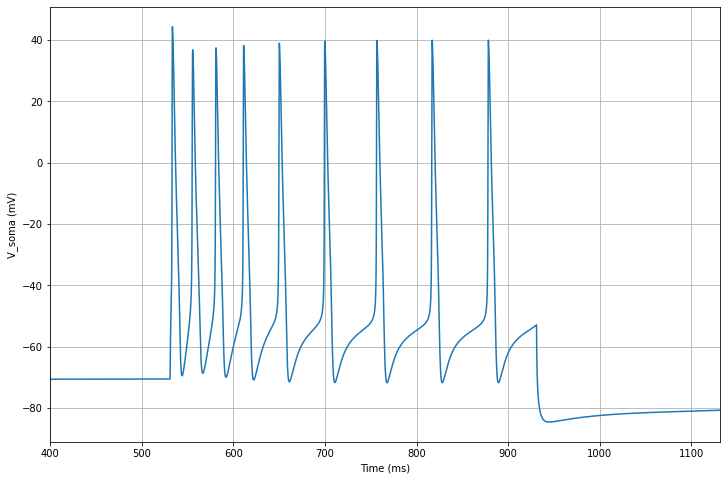

In [15]:
neuron.h.dt = 0.05
neuron.h.cvode_active(0)
neuron.h.tstop = timesimulation # ms
neuron.h.run();
        
time = np.array(recordings['time'])
soma_voltage = np.array(recordings['soma(0.5)'])

bmtkTraces.append(soma_voltage)
bmtkTracesList.append(list(soma_voltage))

soma_voltage_filename = os.path.join(
    'soma_voltage_step%d.dat' % (step_number))
np.savetxt(soma_voltage_filename, soma_voltage)

print('Soma voltage for step %d saved to: %s'
        % (step_number, soma_voltage_filename))

fig = plt.figure(figsize=(12,8))

plt.plot(time,soma_voltage)
plt.xlabel('Time (ms)')
plt.ylabel('V_soma (mV)')
plt.xlim(400,timesimulation)
plt.grid(True)

# fig.savefig('{s1}/{s}_BBP_changingT.png'.format(s1=outFolder,s=folder[cellnumber]))

In [16]:
time = neuron.h.Vector()
voltage = neuron.h.Vector()
ik = neuron.h.Vector()

time.record(neuron.h._ref_t)
voltage.record(soma(.5)._ref_v);
ik.record(soma(.5)._ref_ik);

neuron.h.run()

def plot_tv(time_array, voltage_array, show=True, label=None, ylabel='Membrane voltage (mV)', xyaxis=[400, 4000, -85, 50] , constants=[]):
    import matplotlib.pyplot as plt
    import numpy
    plt.plot(time_array, voltage_array, label=label)
    for constant in constants:
        plt.plot(time_array, constant*numpy.ones(len(time_array)))
    plt.xlabel('Time (ms)')
    plt.ylabel(ylabel)
    plt.axis(xyaxis)
    if show:
        plt.show()

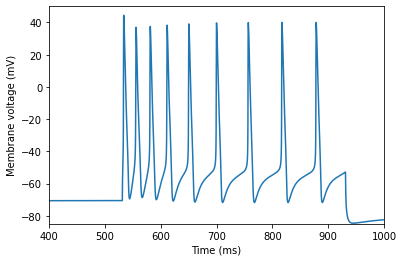

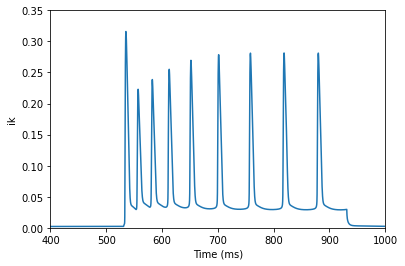

In [18]:
plot_tv(time, voltage, ylabel='Membrane voltage (mV)', xyaxis=[400, 1000, -85, 50])
plot_tv(time, ik, ylabel='ik', xyaxis=[400, 1000, 0, 0.35])

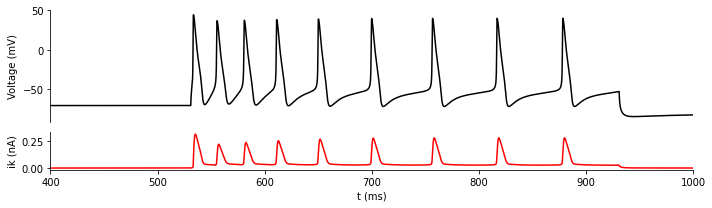

In [19]:
f, (ax0, ax1) = plt.subplots(2,1, figsize=(10,3), gridspec_kw = {'height_ratios':[3, 1]})
ax0.plot(time,voltage, 'k')
ax1.plot(time,ik, 'r')

ax0.set_ylabel('Voltage (mV)')
ax0.set_xlim(400,1000)
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.spines['bottom'].set_visible(False)
ax0.get_xaxis().set_visible(False)


# ax1.plot([5,5],[0.25,0.75],'k')
# ax1.text(10,0.5,'500pA',va='center')
ax1.set_ylabel('ik (nA)')
ax1.set_xlabel('t (ms)')
ax1.set_xlim(400,1000)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(True)
ax1.get_yaxis().set_visible(True)
plt.tight_layout()

In [57]:
list(cell.soma[0](0.5))

[ca_ion,
 cacum,
 k_ion,
 cagk,
 kca,
 cat,
 cal,
 can,
 hd,
 kap,
 kmb,
 ttx_ion,
 na_ion,
 nax,
 kdr,
 pas]

In [64]:
print(cell.soma[0].ena,cell.soma[0].ek)

50.0 -90.0


In [85]:
from neuron import h, gui2
gui2.set_backend('jupyter')
# h.load_file('/home/fernando/CA1_netpyne/info/data-bbp/20191017/morphologies/swc/' + MorphoName)  
ps = gui2.PlotShape()
ps.variable('v')
ps.show(0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [116]:
%%capture
!pip install NeuroM[plotly]
%matplotlib inline

# Import neurom module
import neurom as nm
# Import neurom visualization module
from neurom import viewer
from neurom.view import plotly

neuronM = nm.load_neuron(MorphologyPath + MorphoName)

# Visualize a morphology in two dimensions
# fig, ax = plotly.draw(neuron, plane='xy', inline=True)
# Visualize a morphology in three dimensions
# fig, ax = plotly.draw(neuron, inline=True)
# Visualize a single tree in three dimensions
# fig, ax = plotly.draw(neuron.neurites[0], inline=True)
# Visualize the dendrogram of a morphology
# fig, ax = viewer.draw(neuron, mode='dendrogram')

In [119]:
fig, ax = plotly.draw(neuronM, inline=True)

In [120]:
# Extract the total number of neurites (basal and apical dendrites, and axons)
number_of_neurites = nm.get('number_of_neurites', neuron)

# Extract the total number of sections
number_of_sections = nm.get('number_of_sections', neuron)

# Extract the soma radius
soma_radius = neuron.soma.radius

# Extract the number of sections per neurite
number_of_sections_per_neurite = nm.get('number_of_sections_per_neurite', neuron)

# Print result
print("Neuron id          : {0} \n\
Number of neurites : {1} \n\
Soma radius        : {2:.2f} \n\
Number of sections : {3}".format(neuron.name, number_of_neurites[0], soma_radius, number_of_sections[0]))
print()
print("Neurite type \t\t\t| Number of sections")
for i, neurite in enumerate(neuron.neurites):    
    print("{0:31} | {1}".format(str(neurite.type), number_of_sections_per_neurite[i]))

Neuron id          : dend-051208AM2_axon-mpg141017_a1-2_idC_-_Scale_x1.000_y0.850_z1.000 
Number of neurites : 7 
Soma radius        : 9.32 
Number of sections : 230

Neurite type 			| Number of sections
NeuriteType.axon                | 61
NeuriteType.basal_dendrite      | 14
NeuriteType.basal_dendrite      | 9
NeuriteType.basal_dendrite      | 7
NeuriteType.basal_dendrite      | 7
NeuriteType.basal_dendrite      | 3
NeuriteType.apical_dendrite     | 129


In [ ]:
import efel

bmtkTraces = []
bmtkTracesList = []

step1_current = 1.2/8.0

current = step1_current/1.2 + 1*step1_current/12.0
for c in range(0,9):
    
    recordings = {}

    recordings['time'] = neuron.h.Vector()
    recordings['soma(0.5)'] = neuron.h.Vector()

    recordings['time'].record(neuron.h._ref_t, 0.1)
    recordings['soma(0.5)'].record(cell.soma[0](0.5)._ref_v, 0.1)

    stimulus.amp = current
    
    current = current + step1_current/12.0    

    neuron.h.run();

    time = np.array(recordings['time'])
    soma_voltage = np.array(recordings['soma(0.5)'])

    bmtkTraces.append(soma_voltage)
    bmtkTracesList.append(list(soma_voltage))

traces = []
for c in range(0,9):
    bmtkTrace = bmtkTraces[c]
    trace = {}
    trace['T'] = time
    trace['V'] = bmtkTrace
    trace['stim_start'] = [700]
    trace['stim_end'] = [2700]
    traces.append(trace)

feature_values = efel.getFeatureValues(traces, ['mean_frequency', 'time_to_first_spike', 'peak_time'])

import pylab
current = step1_current/1.2 + 4*step1_current/12.0
for step_number in range(9):
    pylab.bar(step_number, feature_values[step_number]['time_to_first_spike'][0], align='center')
pylab.ylabel('time_to_first_spike (ms)')
pylab.xlabel('current')
pylab.xticks(range(9), range(1,10))
pylab.show()

for step_number in range(9):
    pylab.bar(step_number, feature_values[step_number]['mean_frequency'][0], align='center')
pylab.ylabel('Mean frequency (Hz)')
pylab.xlabel('current')
pylab.xticks(range(9), range(1,10))
pylab.show()

feature_values

In [10]:
# list(cell.soma[0](0.5))

# cell.all

# %matplotlib inline
# from matplotlib import pyplot, cm
# neuron.h.PlotShape(cell.somatic, True)

# cell.soma[0](0.5).gNaTs2_tbar_NaTs2_t - sim.net.cells[0].secs['soma_0'].mechs.NaTs2_t.gNaTs2_tbar
# cell.soma[0](0.5).gSKv3_1bar_SKv3_1 - sim.net.cells[0].secs['soma_0'].mechs.SKv3_1.gSKv3_1bar

# import neurom
# import neurom.viewer
# nrn = neurom.load_neuron('morphology/sm090918b1-3_idA_-_Scale_x1.000_y1.025_z1.000.asc') # load a neuron
# fig3d, _ = neurom.viewer.draw(nrn.soma, mode='3d') # 3d plot
# fig3d.show()

# sim.analysis.plotShape()
# geompt3d = sim.net.cells[0].secs['soma_0'].geom.pt3d
# sim.net.cells[0].secs['soma_0'].geom.pt3d[10]